In [1]:
import pandas as pd
import os

dataset_folder = "dataset"
movies_data_path  = os.path.join(dataset_folder, "movies.csv")
financial_data_path = os.path.join(dataset_folder, "financials.csv")
opening_data_path = os.path.join(dataset_folder, "opening_gross.csv")

movies_data = pd.read_csv(movies_data_path)
financial_data = pd.read_csv(financial_data_path)
opening_data = pd.read_csv(opening_data_path)

print(f"Movies Data shape: {movies_data.shape}")
print(f"Financial Data shape: {financial_data.shape}")
print(f"Opening Data shape: {opening_data.shape}")

Movies Data shape: (5043, 8)
Financial Data shape: (4341, 8)
Opening Data shape: (2272, 3)


# Openinig EDA

In [2]:
opening_data.head()

,movie_title,opening_gross,screens
0,10 Days in a Madhouse,2451.0,10.0
1,10 Things I Hate About You,8330681.0,2271.0
2,102 Dalmatians,19883351.0,2704.0
3,12 Rounds,5329240.0,2331.0
4,12 Years a Slave,923715.0,19.0


In [3]:
opening_data.movie_title.unique().shape

(2272,)

/Users/arturopolancolozano/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


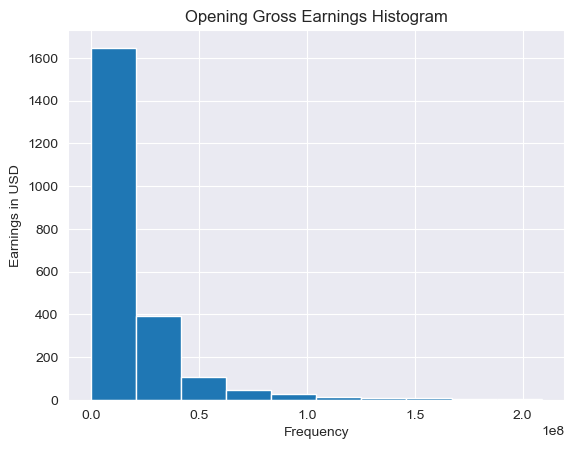

In [4]:
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

opening_data.opening_gross.plot.hist()
plt.title("Opening Gross Earnings Histogram")
plt.xlabel("Frequency")
plt.ylabel("Earnings in USD");

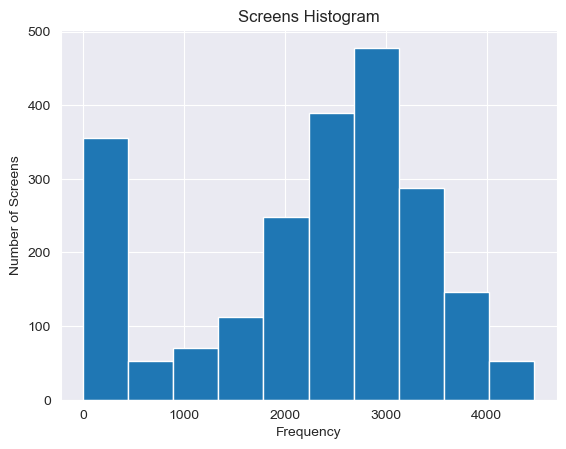

In [5]:
opening_data.screens.plot.hist()
plt.title("Screens Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of Screens");

In [6]:
opening_data[["opening_gross", "screens"]].describe().T

,count,mean,std,min,25%,50%,75%,max
opening_gross,2247.0,1.765171e+07,2.237313e+07,607.0,4534145.00,11503423.0,21721184.00,208806270.0
screens,2190.0,2.239674e+03,1.197272e+03,1.0,1631.25,2549.0,3070.75,4468.0


In [7]:
opening_data.isnull().sum()

movie_title       0
opening_gross    25
screens          82
dtype: int64

# Movies EDA

In [8]:
print(f"Movies Data shape: {movies_data.shape}")

movies_data.head()

Movies Data shape: (5043, 8)


,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross,movie_title
0,2009.0,1.78,178.0,4834,237000000.0,7.9,760505847.0,Avatar
1,2007.0,2.35,169.0,48350,300000000.0,7.1,309404152.0,Pirates of the Caribbean: At World's End
2,2015.0,2.35,148.0,11700,245000000.0,6.8,200074175.0,Spectre
3,2012.0,2.35,164.0,106759,250000000.0,8.5,448130642.0,The Dark Knight Rises
4,NaN,NaN,NaN,143,NaN,7.1,NaN,Star Wars: Episode VII - The Force Awakens ...


In [9]:
movies_data.isnull().sum()

title_year                   108
aspect_ratio                 329
duration                      15
cast_total_facebook_likes      0
budget                       492
imdb_score                     0
gross                        884
movie_title                    0
dtype: int64

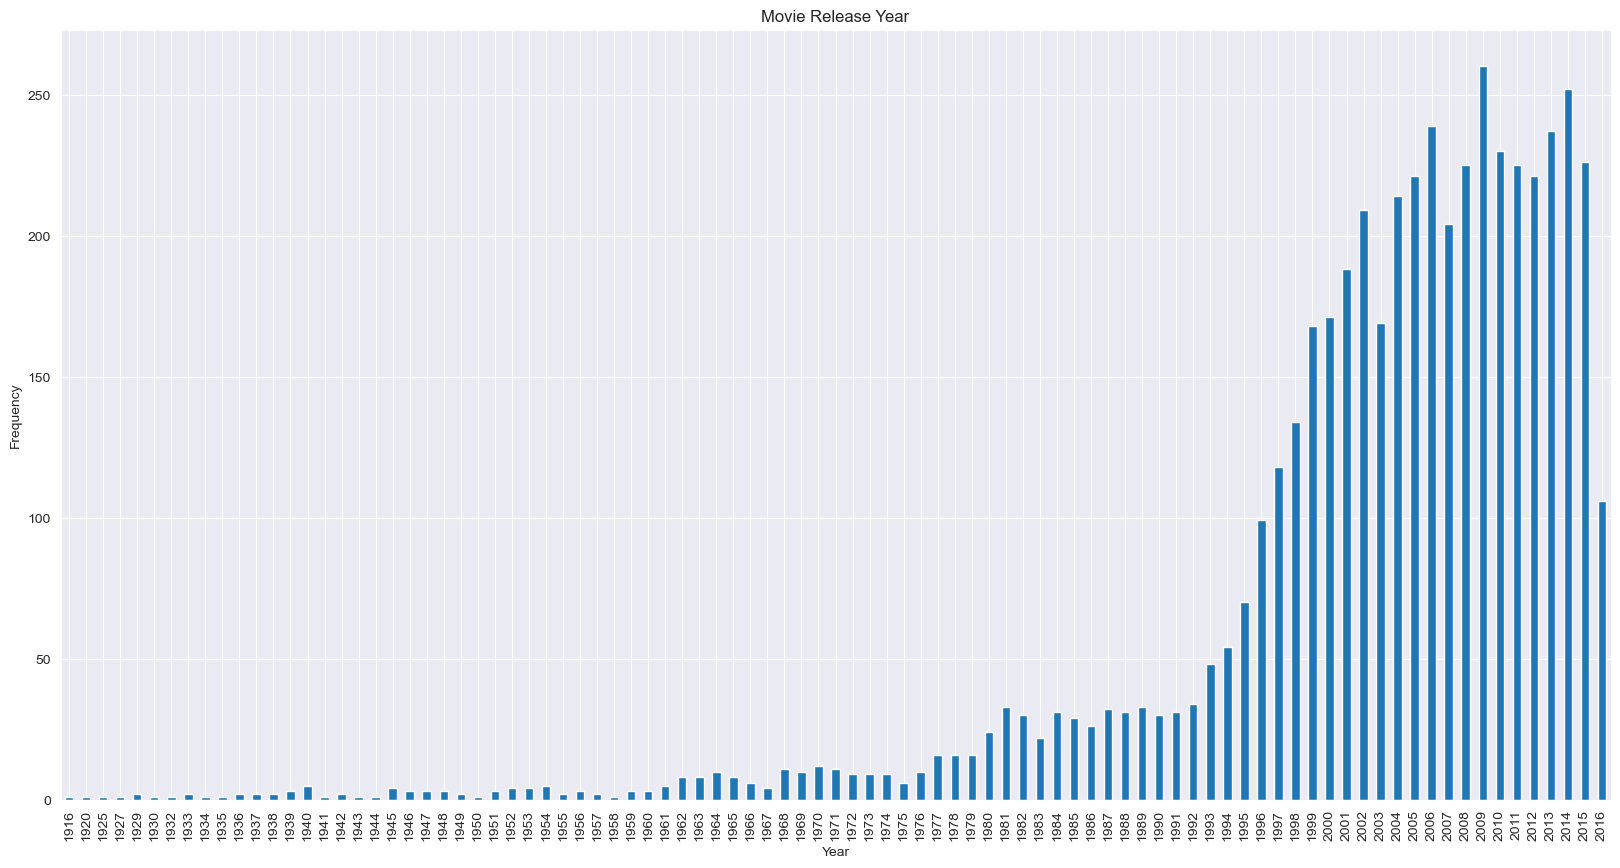

In [10]:
movies_data['title_year'] = movies_data['title_year'].fillna(0).astype('int')

remove_zeros = movies_data.title_year == 0
movies_data.title_year[~remove_zeros].value_counts().sort_index().plot.bar(
    figsize=(20, 10), 
    title="Movie Release Year"
)
plt.xlabel("Year")
plt.ylabel("Frequency");

In [11]:
movies_data.aspect_ratio.describe()

count    4714.000000
mean        2.220403
std         1.385113
min         1.180000
25%         1.850000
50%         2.350000
75%         2.350000
max        16.000000
Name: aspect_ratio, dtype: float64

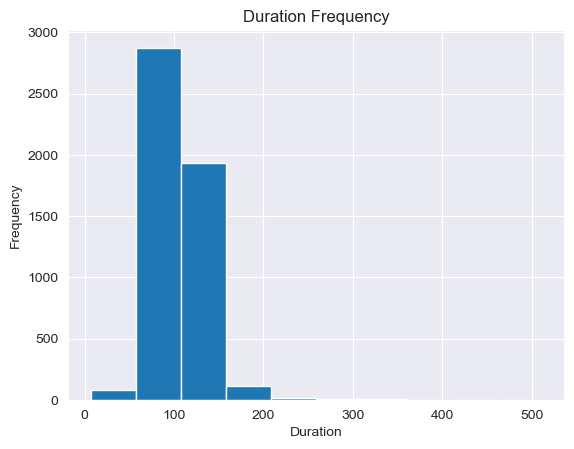

In [12]:
movies_data.duration.plot.hist(title="Duration Frequency")
plt.xlabel("Duration");


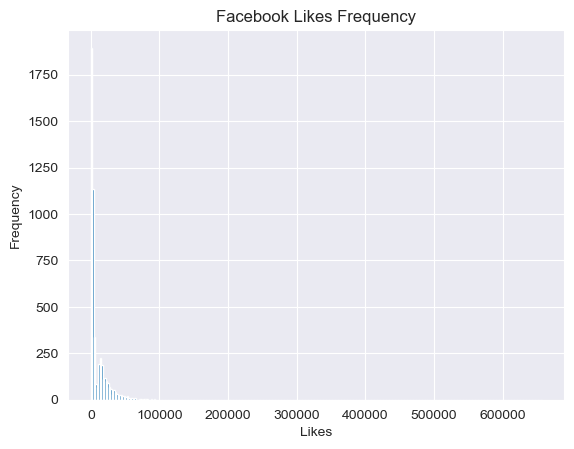

In [13]:
movies_data.cast_total_facebook_likes.plot.hist(
    title="Facebook Likes Frequency", 
    bins=300
)
plt.xlabel("Likes");

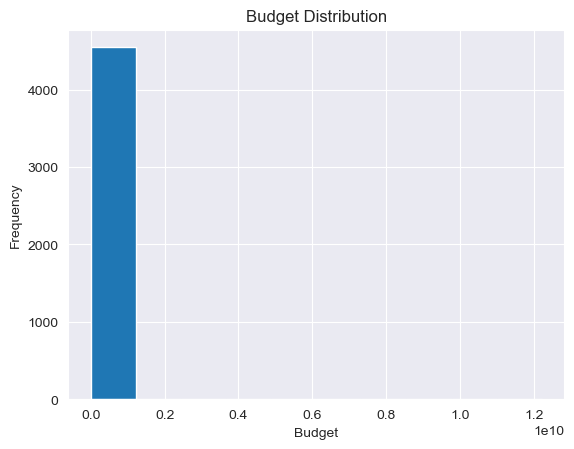

In [14]:
movies_data.budget.plot.hist(
    title="Budget Distribution", 
)
plt.xlabel("Budget");

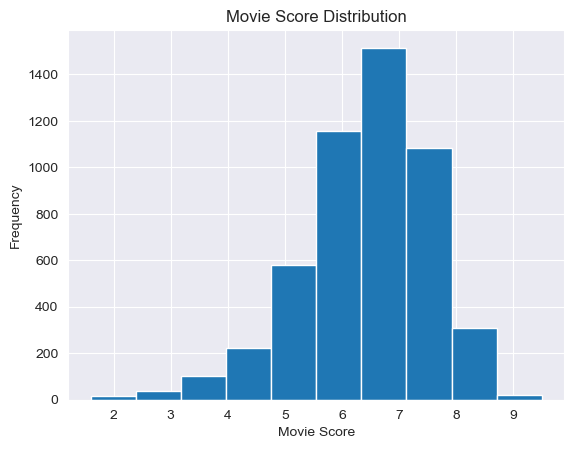

In [15]:
movies_data.imdb_score.plot.hist(
    title="Movie Score Distribution", 
)
plt.xlabel("Movie Score");

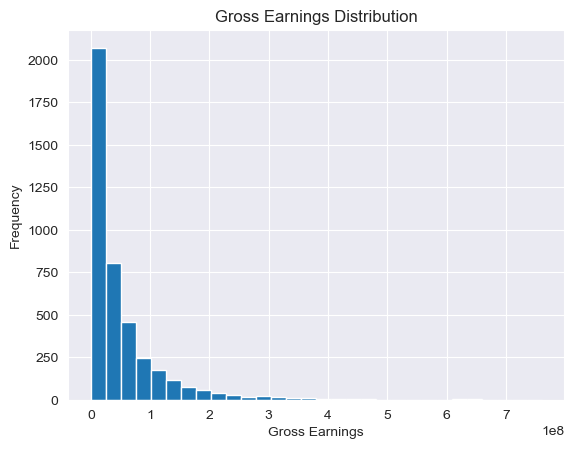

In [16]:
movies_data.gross.plot.hist(
    title="Gross Earnings Distribution", 
    bins=30
)
plt.xlabel("Gross Earnings");

# Finance Data

In [17]:
financial_data = financial_data.drop(columns=["Unnamed: 0"], axis=1)
financial_data.head()

,movie_name,domestic_gross,movie_link,production_budget,release_date,worldwide_gross,movie_title
0,Avatar,760507625,http://www.the-numbers.com/movie/Avatar#tab=su...,425000000,12/18/2009,2783918982,Avatar
1,Star Wars Ep. VII: The Force Awakens,936662225,http://www.the-numbers.com/movie/Star-Wars-Ep-...,306000000,12/18/2015,2058662225,Star Wars: Episode VII - The Force Awakens ...
2,Pirates of the Caribbean: At World's End,309420425,http://www.the-numbers.com/movie/Pirates-of-th...,300000000,5/24/2007,963420425,Pirates of the Caribbean: At World's End
3,Spectre,200074175,http://www.the-numbers.com/movie/Spectre#tab=s...,300000000,11/6/2015,879620923,Spectre
4,The Dark Knight Rises,448139099,http://www.the-numbers.com/movie/Dark-Knight-R...,275000000,7/20/2012,1084439099,The Dark Knight Rises


In [18]:
financial_data._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
domestic_gross,4341.0,4.231370e+07,6.608159e+07,0.0,2047570.0,18400000.0,54098051.0,9.366622e+08
production_budget,4341.0,3.134350e+07,4.022773e+07,1100.0,5000000.0,18000000.0,40000000.0,4.250000e+08
worldwide_gross,4341.0,8.929914e+07,1.690069e+08,0.0,4358000.0,28544120.0,98406855.0,2.783919e+09


# Data Selection

In [21]:
fin_columns = ["movie_title", "production_budget", "worldwide_gross"]
financial_data = financial_data[fin_columns]
financial_data.head()

,movie_title,production_budget,worldwide_gross
0,Avatar,425000000,2783918982
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225
2,Pirates of the Caribbean: At World's End,300000000,963420425
3,Spectre,300000000,879620923
4,The Dark Knight Rises,275000000,1084439099


In [22]:
movies_data.head()

,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross,movie_title
0,2009,1.78,178.0,4834,237000000.0,7.9,760505847.0,Avatar
1,2007,2.35,169.0,48350,300000000.0,7.1,309404152.0,Pirates of the Caribbean: At World's End
2,2015,2.35,148.0,11700,245000000.0,6.8,200074175.0,Spectre
3,2012,2.35,164.0,106759,250000000.0,8.5,448130642.0,The Dark Knight Rises
4,0,NaN,NaN,143,NaN,7.1,NaN,Star Wars: Episode VII - The Force Awakens ...


In [23]:
data = pd.merge(financial_data, movies_data, on="movie_title", how="left")
data.head()

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,425000000,2783918982,2009,1.78,178.0,4834,237000000.0,7.9,760505847.0
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225,0,NaN,NaN,143,NaN,7.1,NaN
2,Pirates of the Caribbean: At World's End,300000000,963420425,2007,2.35,169.0,48350,300000000.0,7.1,309404152.0
3,Spectre,300000000,879620923,2015,2.35,148.0,11700,245000000.0,6.8,200074175.0
4,The Dark Knight Rises,275000000,1084439099,2012,2.35,164.0,106759,250000000.0,8.5,448130642.0


In [24]:
data = pd.merge(data, opening_data, on="movie_title", how="left")
data.head()

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross,opening_gross,screens
0,Avatar,425000000,2783918982,2009,1.78,178.0,4834,237000000.0,7.9,760505847.0,77025481.0,3452.0
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225,0,NaN,NaN,143,NaN,7.1,NaN,NaN,NaN
2,Pirates of the Caribbean: At World's End,300000000,963420425,2007,2.35,169.0,48350,300000000.0,7.1,309404152.0,139802190.0,4362.0
3,Spectre,300000000,879620923,2015,2.35,148.0,11700,245000000.0,6.8,200074175.0,70403148.0,3929.0
4,The Dark Knight Rises,275000000,1084439099,2012,2.35,164.0,106759,250000000.0,8.5,448130642.0,160887295.0,4404.0


In [29]:
data.drop(columns=["movie_title", "gross"], axis=1, inplace=True)
print(data.shape)

(4385, 10)


In [30]:
data.isnull().sum()

production_budget               0
worldwide_gross                 0
title_year                      0
aspect_ratio                  274
duration                       13
cast_total_facebook_likes       0
budget                        335
imdb_score                      0
opening_gross                2106
screens                      2164
dtype: int64

In [33]:
data.dropna(inplace=True)
print(data.shape)

(2140, 10)


In [34]:
output_data_dir = os.path.join(dataset_folder, "data.csv")
data.to_csv(output_data_dir, index=False)